In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Joining season stats together into one table

In [29]:
df_2122 = pd.read_csv("21-22Reg.csv", sep=";", encoding='latin1')
df_2122["SZN"] = "21-22"

df_2223 = pd.read_csv("22-23Reg.csv", sep=";", encoding='latin1')
df_2223["SZN"] = "22-23"

df_2324 = pd.read_csv("23-24Reg.csv", sep=";", encoding='latin1')
df_2324["SZN"] = "23-24"

df_all = pd.concat([df_2122, df_2223, df_2324], ignore_index=True)

df_all.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN
2221,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,23-24
2222,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,23-24
2223,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,23-24
2224,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,23-24
2225,572,Ivica Zubac,C,26,LAC,68,68,26.4,5.0,7.6,...,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,23-24


### Creating a histogram of points scored in the 2021-22 season

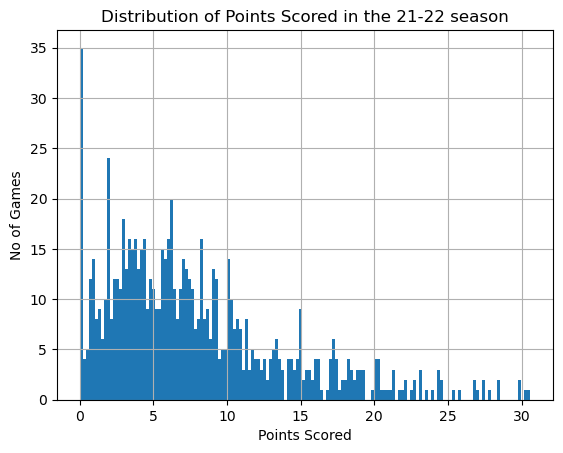

In [30]:
szn2122_stats = df_all.loc[df_all["SZN"] == "21-22"]
szn2122_stats["PTS"].hist(bins=150)
plt.xlabel("Points Scored")
plt.ylabel("No of Games")
plt.title("Distribution of Points Scored in the 21-22 season")

plt.show()

### Calculating the rolling average of Anthony Edwards points over 3 seasons

In [31]:
ant_stats = df_all.loc[df_all["Player"] == "Anthony Edwards"].copy()
ant_stats["PTS_RollingAvg"] = ant_stats["PTS"].rolling(window=3).mean()
print(ant_stats[["PTS", "PTS_RollingAvg"]])

       PTS  PTS_RollingAvg
200   21.3             NaN
991   24.6             NaN
1674  25.9       23.933333


### Plotting a bar chart of total points scored by each team in the 2023-24 season

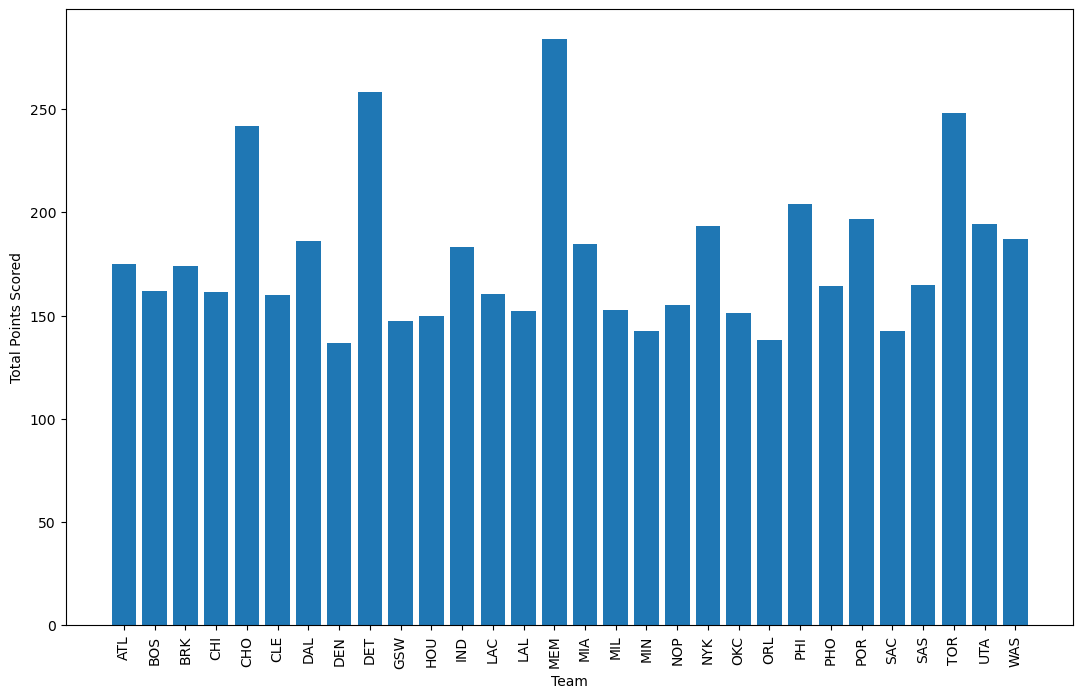

In [32]:
szn2324_stats = df_all.loc[(df_all["SZN"] == "23-24") & ~(df_all["Tm"] == "TOT")]
team_pts = szn2324_stats.groupby("Tm")["PTS"].sum()

plt.figure(figsize=(13,8))
plt.bar(team_pts.index, team_pts.values)
plt.xlabel("Team")
plt.ylabel("Total Points Scored")
plt.xticks(rotation=90)
plt.show()

### Scatter Graph showing minutes played vs points scored by point guards in the 22-23 season 

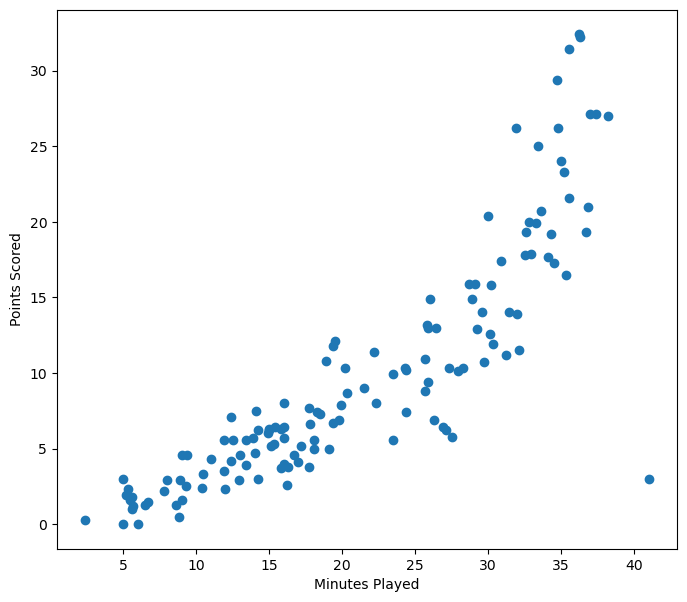

In [33]:
pg_szn2223_stats = df_all.loc[(df_all["SZN"] == "22-23") & (df_all["Pos"] == "PG")]
plt.figure(figsize=(8,7))
plt.scatter(pg_szn2223_stats["MP"], pg_szn2223_stats["PTS"])
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")
plt.show()

### Using Linear Regression to predict the number of points scored by Point Guards based on minutes played from 2021-2024.

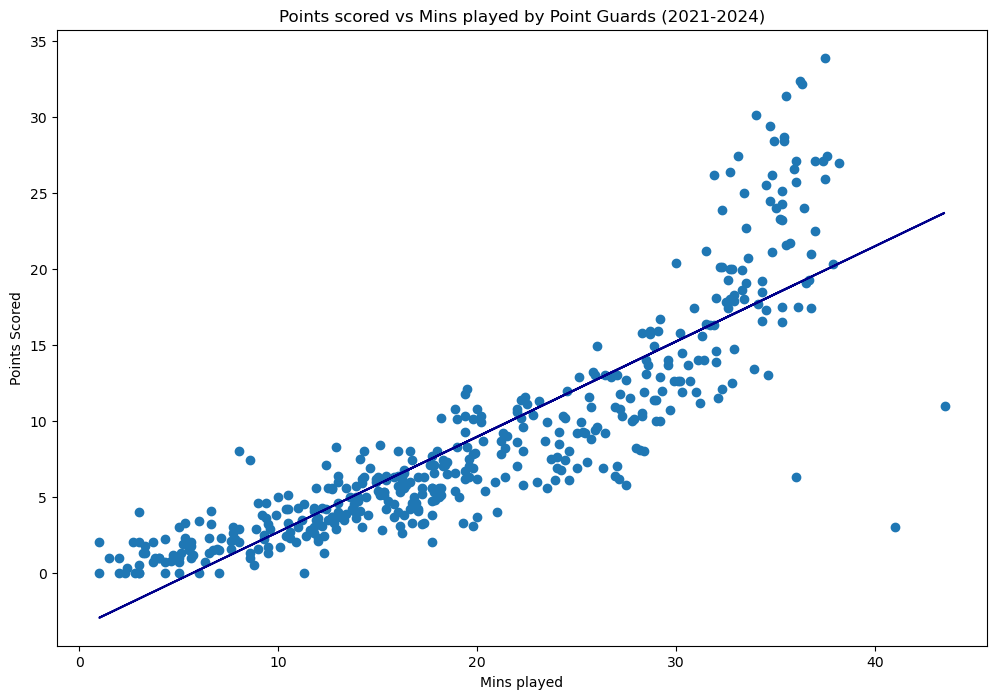

0.7527943717196619


In [34]:
pg_stats = df_all.loc[df_all["Pos"] == "PG"]
pg_points = pg_stats["PTS"]
pg_mins = pg_stats["MP"]

slope, intercept, r, p, std_err = stats.linregress(pg_mins, pg_points)
def linearModel(x):
    return slope * x + intercept #y = mx + b

model = list(map(linearModel, pg_mins))

plt.figure(figsize=(12,8))
plt.scatter(pg_mins, pg_points)
plt.plot(pg_mins, model, color="darkblue")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Points scored vs Mins played by Point Guards (2021-2024)")
plt.show()
print(r2_score(pg_points, model))

# Train/Test on PG data using linear regression

In [35]:
mins_train, mins_test, pts_train, pts_test = train_test_split(pg_mins, pg_points, test_size=0.2, random_state=42) 

### Training Set

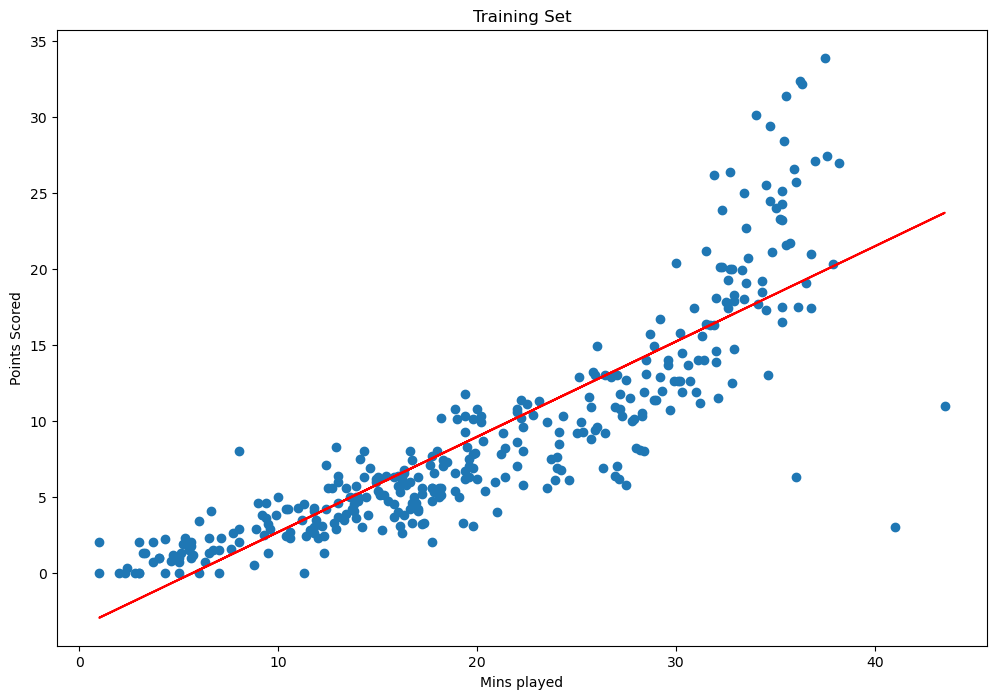

0.7419824272498212


In [36]:
train_model = list(map(linearModel, mins_train))
plt.figure(figsize=(12,8))
plt.scatter(mins_train, pts_train)
plt.plot(mins_train, train_model, color="red")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Training Set")
plt.show()
print(r2_score(pts_train, train_model))


### Testing Set

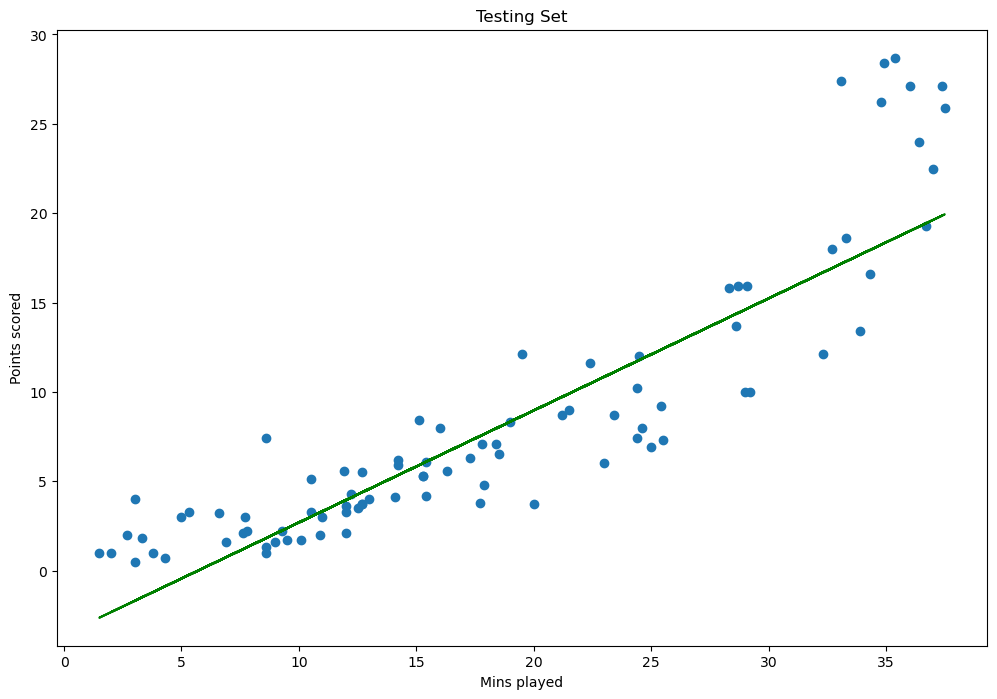

0.7900378366934182


In [37]:
test_model = list(map(linearModel, mins_test))
plt.figure(figsize=(12,8))
plt.scatter(mins_test, pts_test)
plt.plot(mins_test, test_model, color="green")
plt.xlabel("Mins played")
plt.ylabel("Points scored")
plt.title("Testing Set")
plt.show()
print(r2_score(pts_test, test_model))

# The same dataframe but using polynomial regression

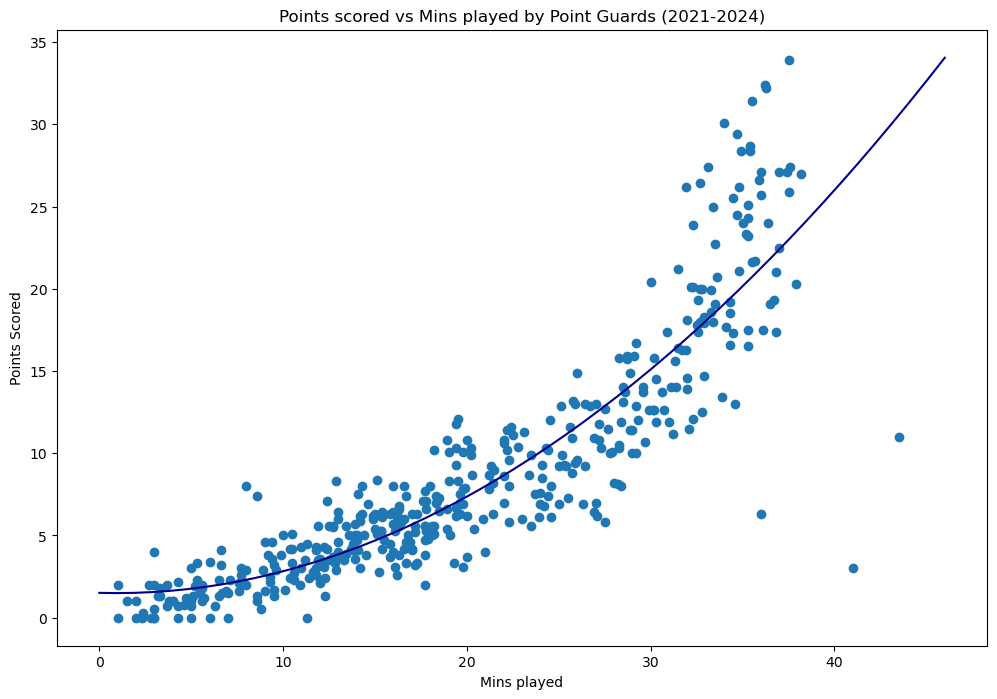

0.7993835083934387


In [38]:
poly_model = np.poly1d(np.polyfit(pg_mins, pg_points, 3))
poly_line = np.linspace(0, 46)

plt.figure(figsize=(12,8))
plt.scatter(pg_mins, pg_points)
plt.plot(poly_line, poly_model(poly_line), color="darkblue")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Points scored vs Mins played by Point Guards (2021-2024)")
plt.show()
print(r2_score(pg_points, poly_model(pg_mins)))


### Generating Train/Test splits

In [39]:
poly_mins_train, poly_mins_test, poly_pts_train, poly_pts_test = train_test_split(pg_mins, pg_points, test_size=0.2, random_state=42)

### Training Set

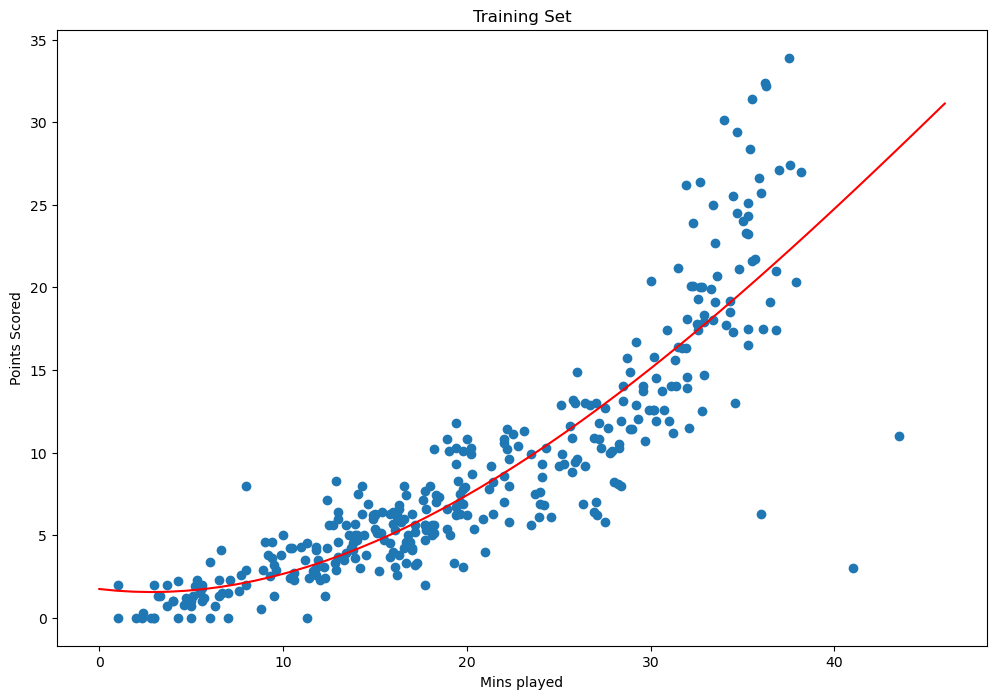

0.7813316814105128


In [40]:
poly_train_model = np.poly1d(np.polyfit(poly_mins_train, poly_pts_train, 3))
poly_train_line = np.linspace(0,46)

plt.figure(figsize=(12,8))
plt.scatter(poly_mins_train, poly_pts_train)
plt.plot(poly_train_line, poly_train_model(poly_train_line), color="red")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Training Set")
plt.show()
print(r2_score(poly_pts_train, poly_train_model(poly_mins_train)))

### Testing Set

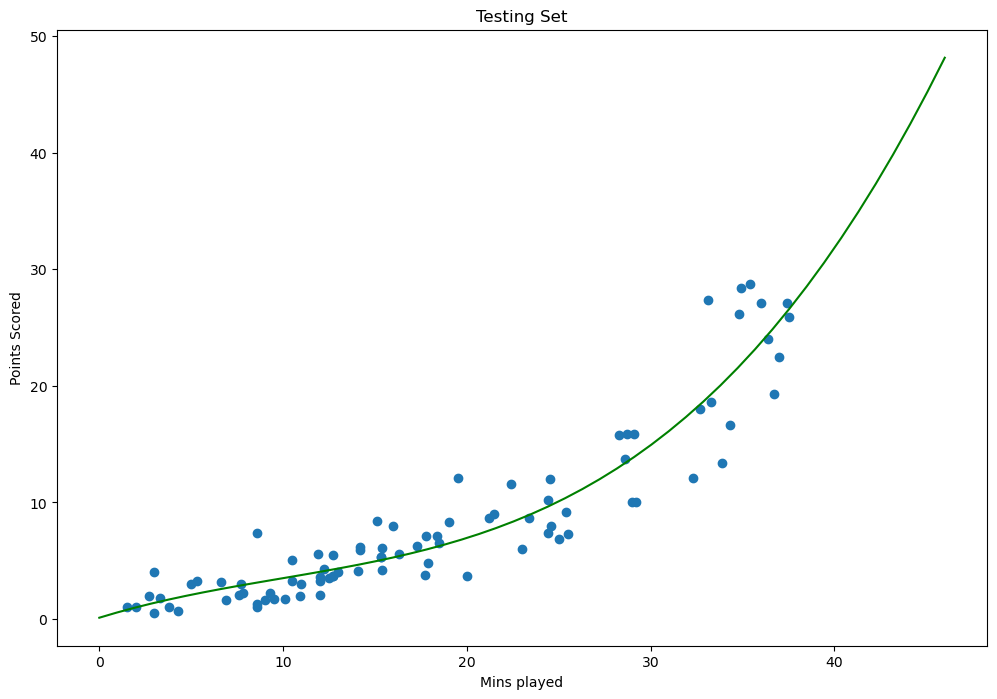

0.8852921047234175


In [41]:
poly_test_model = np.poly1d(np.polyfit(poly_mins_test, poly_pts_test, 3))
poly_test_line = np.linspace(0,46)

plt.figure(figsize=(12,8))
plt.scatter(poly_mins_test, poly_pts_test)
plt.plot(poly_test_line, poly_test_model(poly_test_line), color="green")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Testing Set")
plt.show()
print(r2_score(poly_pts_test, poly_test_model(poly_mins_test)))

## Using multiple features to predict PTS for PGs

### Linear Regression Model

In [42]:
features = ["MP", "FG", "FGA", "AST"]
feats = pg_stats[features]
pts = pg_stats["PTS"]

feats_train, feats_test, pts_train, pts_test = train_test_split(feats, pts, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(feats_train, pts_train)

pts_predicted = model.predict(feats_test)
print(r2_score(pts_test, pts_predicted))
model.coef_

0.9867529896581524


array([-0.0044978 ,  2.20561341,  0.31985437, -0.02405237])

### Polynomial Regression Model

In [43]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_feats_train = poly.fit_transform(feats_train)
poly_feats_test = poly.transform(feats_test)

poly_feats_model = LinearRegression()
poly_feats_model.fit(poly_feats_train, pts_train)

pts_predicted = poly_feats_model.predict(poly_feats_test)
print(r2_score(pts_test, pts_predicted))
poly_feats_model.coef_

0.9898338120932755


array([-2.41015263e-01,  2.79620601e+00, -1.49821054e-01,  7.48624981e-01,
        1.43562287e-02, -1.78183003e-01,  1.07004450e-01, -3.29968878e-02,
       -4.12242801e-01,  6.49495930e-01, -5.46152403e-02, -1.99552071e-01,
       -1.55516337e-01, -2.86759055e-02, -1.57890117e-04,  8.96339369e-03,
       -5.76621876e-03,  1.34244707e-03, -3.12879576e-02, -4.81500393e-03,
        1.04644923e-02,  9.01160037e-03,  7.76068266e-03, -1.10271594e-02,
       -1.93515160e-01,  3.27232315e-01,  3.74334042e-02, -1.49993956e-01,
       -5.83297622e-03, -7.90981764e-02,  1.84777928e-02, -4.82695970e-03,
        1.60723491e-02,  3.28008251e-02])